# Electric Vehicle Sales by State in India

## Data Collection

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("ev_sales_india.csv")

# Inspect dataset
print("Shape:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
df.head()


Shape: (96845, 8)
Data types:
 Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object
Missing values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


## Data Preprocessing

In [40]:
# Correct data types
df['Year'] = df['Year'].astype(int)
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].astype(int)

# Convert date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date', 'EV_Sales_Quantity'], inplace=True)

# Drop columns not needed or redundant
df = df.drop(columns=['Month_Name'])

# Feature extraction
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Date               96845 non-null  datetime64[ns]
 2   State              96845 non-null  object        
 3   Vehicle_Class      96845 non-null  object        
 4   Vehicle_Category   96845 non-null  object        
 5   Vehicle_Type       96845 non-null  object        
 6   EV_Sales_Quantity  96845 non-null  int64         
 7   Month              96845 non-null  int32         
 8   Quarter            96845 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(4)
memory usage: 5.5+ MB


## Exploratory Data Analysis (EDA)


### 📈 Monthly EV Sales Trend

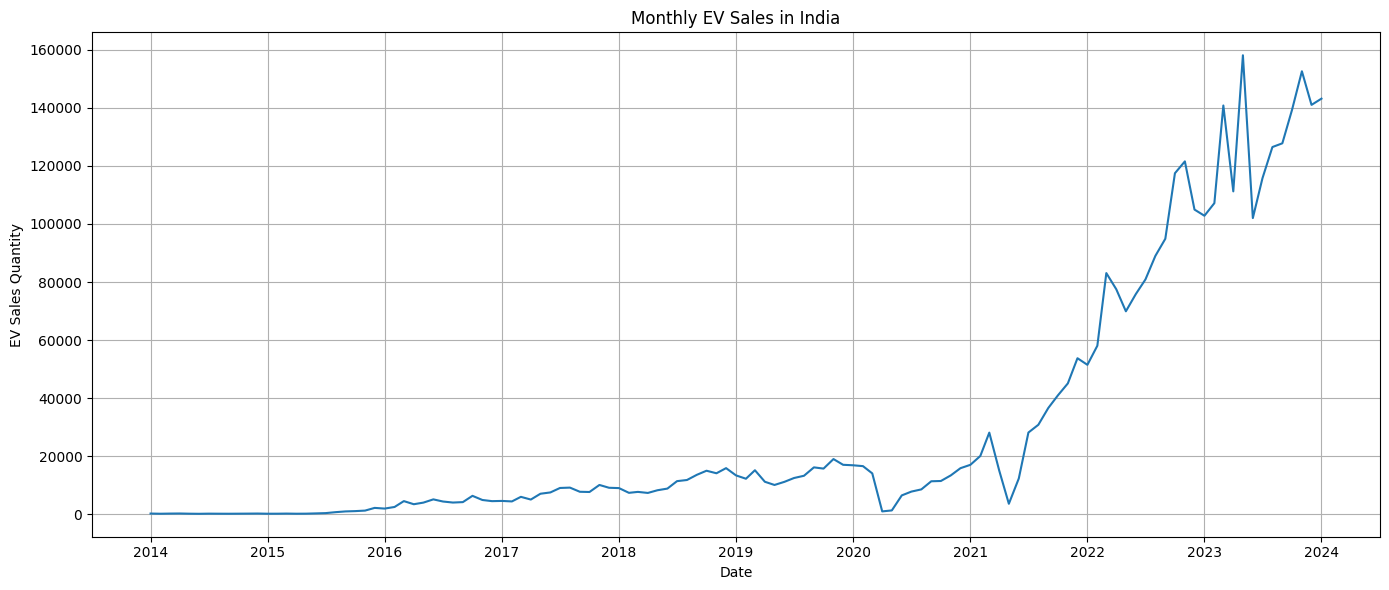

In [41]:
# Group by Month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['EV_Sales_Quantity'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Date'], monthly_sales['EV_Sales_Quantity'])
plt.title("Monthly EV Sales in India")
plt.xlabel("Date")
plt.ylabel("EV Sales Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🗺️ Top 10 States by Total EV Sales

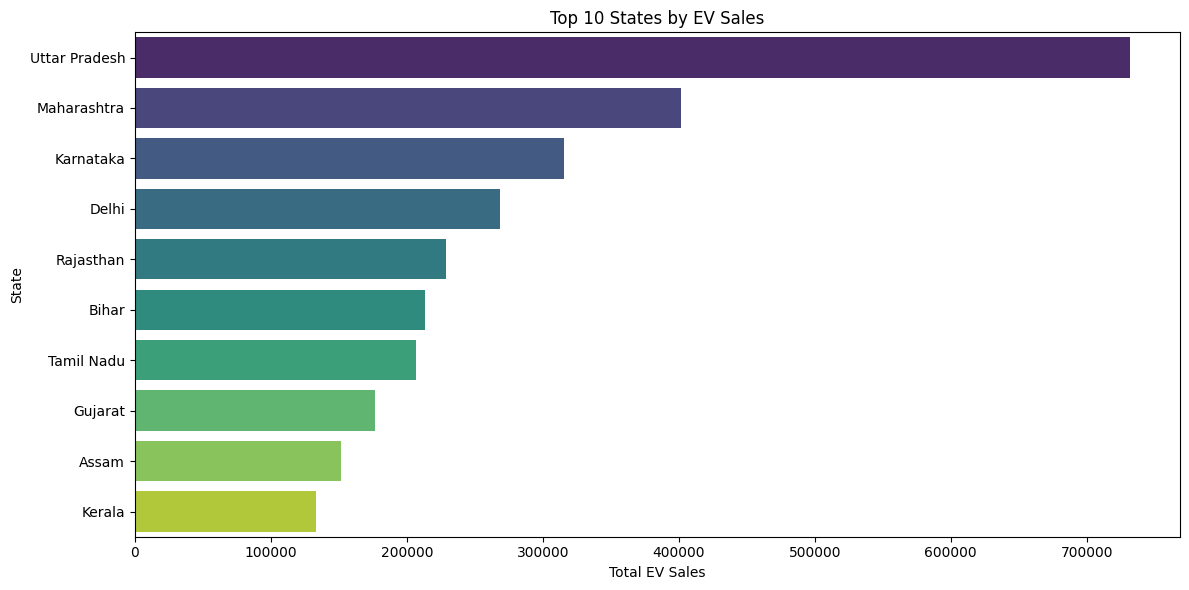

In [42]:
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis', hue=top_states.index, legend=False)
plt.title("Top 10 States by EV Sales")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### 🚗 Sales by Vehicle Class

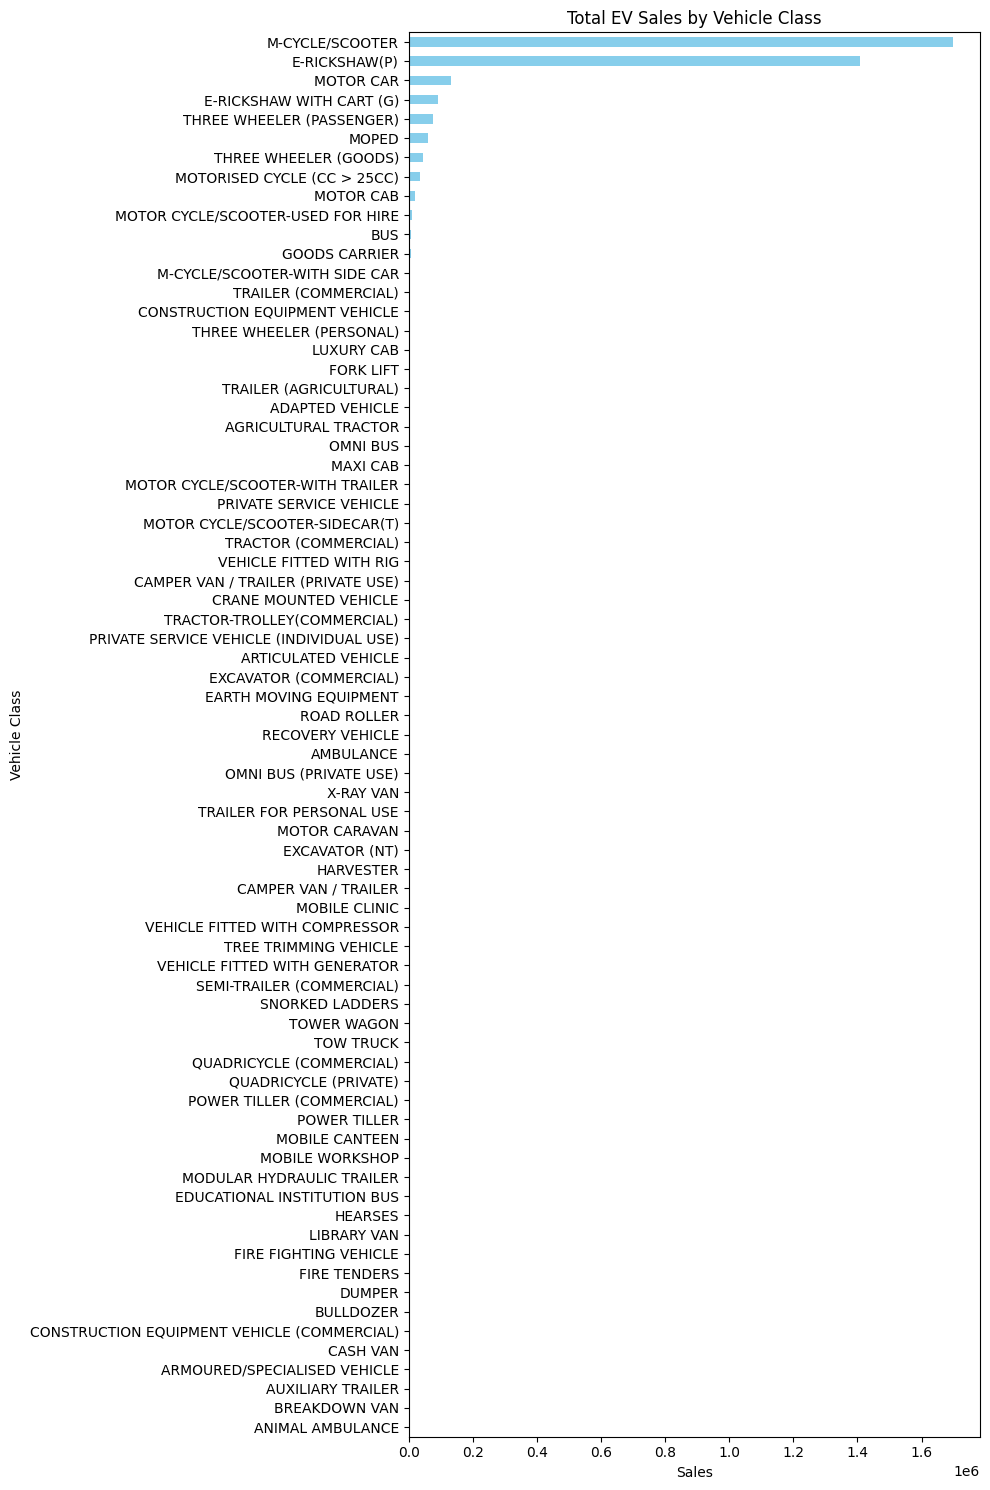

In [43]:
vehicle_class_sales = df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().sort_values()

plt.figure(figsize=(10, 15))
vehicle_class_sales.plot(kind='barh', color='skyblue')
plt.title("Total EV Sales by Vehicle Class")
plt.xlabel("Sales")
plt.ylabel("Vehicle Class")
plt.tight_layout()
plt.show()


### 🔄 Monthly Seasonality Heatmap

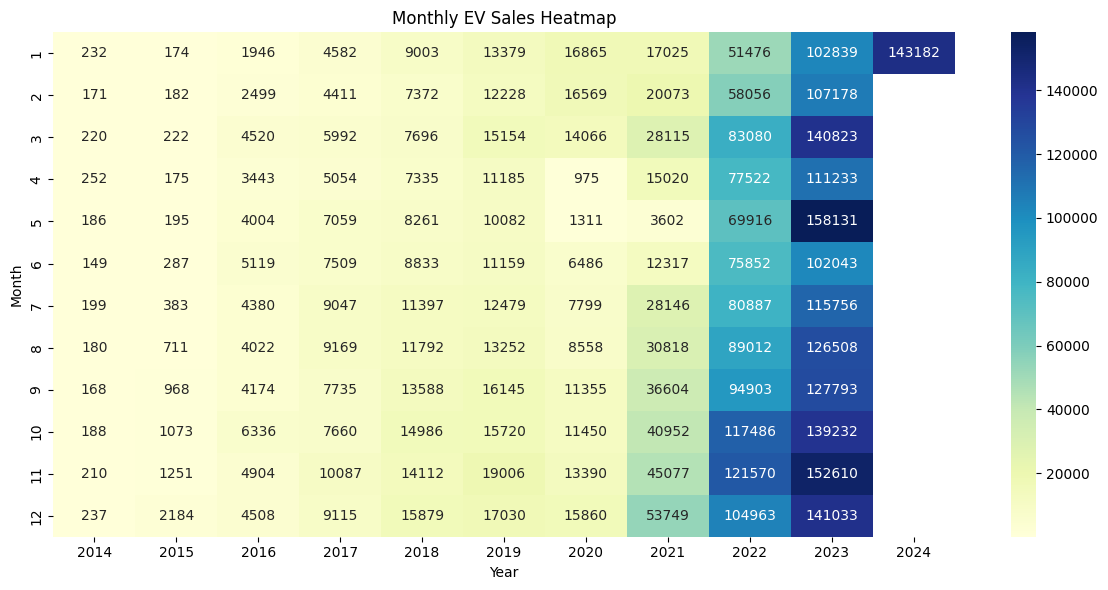

In [44]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
pivot = df.pivot_table(index='Month', columns='Year', values='EV_Sales_Quantity', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Monthly EV Sales Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

## Modeling

### Time Series Forecasting: Monthly EV Sales using Prophet

In [ ]:
# Prepare for Prophet
prophet_df = monthly_sales.rename(columns={'Date': 'ds', 'EV_Sales_Quantity': 'y'})

model = Prophet()
model.fit(prophet_df)

# Future dataframe for 24 months ahead
future = model.make_future_dataframe(periods=24, freq='ME')
forecast = model.predict(future)


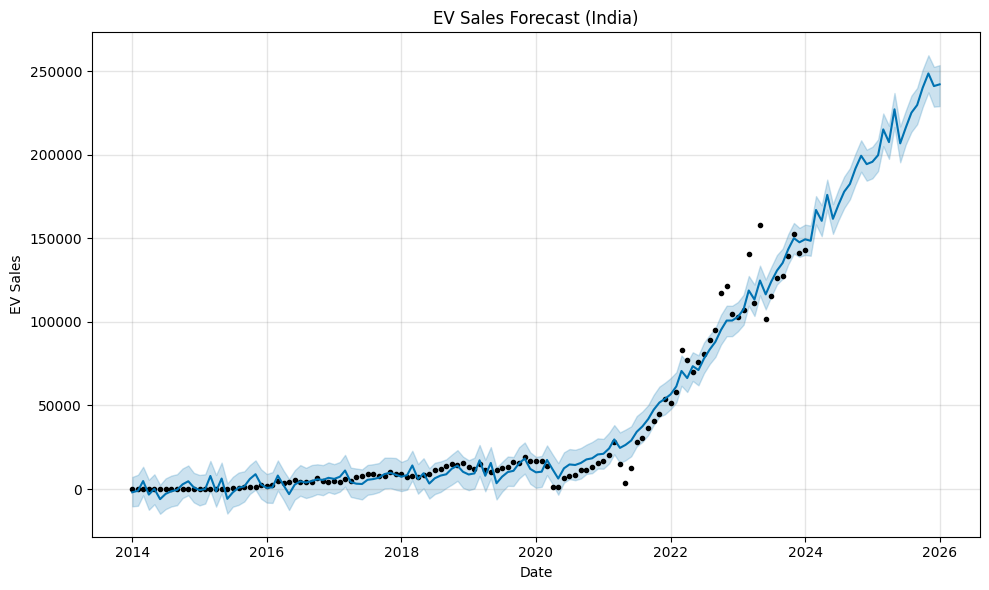

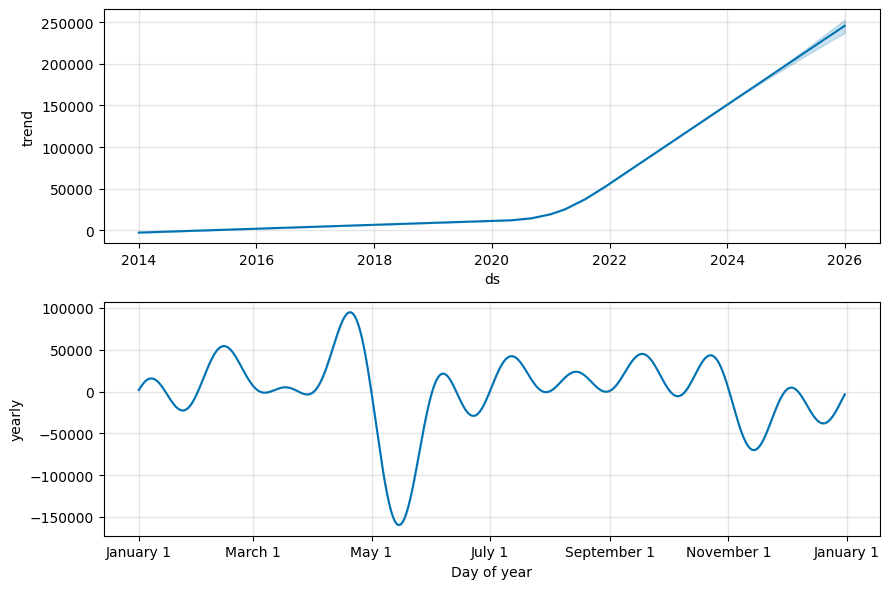

In [55]:
# From earlier Prophet forecast
fig1 = model.plot(forecast)
plt.title("EV Sales Forecast (India)")
plt.ylabel("EV Sales")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

# View components (trend, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [57]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
133,2025-01-31,199852.638205,190338.442732,209248.872691
134,2025-02-28,215257.805183,205201.617598,224794.866753
135,2025-03-31,207640.683741,197606.743012,217504.418300
136,2025-04-30,227274.742534,216646.415714,237075.410583
137,2025-05-31,206892.928578,195538.283769,217029.428862
138,2025-06-30,216236.576491,206122.261732,226398.664803
139,2025-07-31,225268.066599,213778.901768,235465.954847
140,2025-08-31,229826.007495,218320.643806,240089.271845
141,2025-09-30,240178.034270,228602.181567,251054.536128
142,2025-10-31,248755.371105,237391.722199,259636.068567


### EV Sales Prediction using Linear Regression

In [48]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)

# Define features and target
X = df_encoded.drop(['Date', 'EV_Sales_Quantity'], axis=1)
y = df_encoded['EV_Sales_Quantity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 484.11
R² Score: 0.1000


❗ Interpretation:
- 🔻 The R² score is low, indicating that the model struggles to explain most of the variation in EV sales.

- 🔍 A high RMSE suggests the model is not accurately predicting sales, especially in months with high variation.

📌 Summary for Reporting
"Our linear regression model yielded an R² score of 0.10, suggesting that only 10% of EV sales variance is explained by the current feature set. With an RMSE of 484, the model’s predictions deviate significantly from actual sales. This indicates the need for more sophisticated modeling approaches (e.g., Random Forest) and richer data (e.g., temporal trends, policy variables) to better capture real-world EV sales behavior."

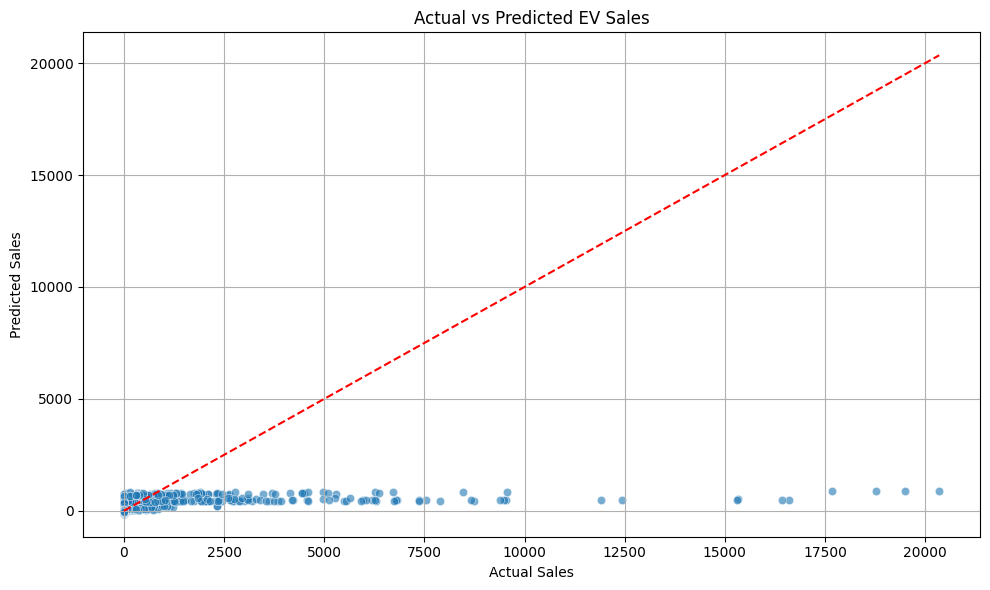

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 What the Scatterplot Suggests
The Actual vs Predicted scatterplot likely showed:

- A weak correlation pattern, with many predictions far from the red diagonal line.

- Flatness or clumping around the center → indication that the model isn't responsive to input variation.



### ✅ Insights Summary
- 📈 Monthly EV sales are steadily increasing with notable spikes post-2022.

- 🗺️ Uttar Pradesh, Maharashtra, and Karnataka lead in total EV sales.

- 🚘 2-Wheelers and 3-Wheelers dominate the EV market.

- 📅 Sales peak in certain months (e.g., March and October), possibly due to fiscal cycles and festivals.

- 🔮 Forecasting predicts continued growth, useful for inventory and infrastructure planning.

